In [2]:
import os
import yaml
import numpy as np

import pylab as plt

from scipy.optimize import brentq, fmin
from scipy.interpolate import interp1d as interp
from scipy.interpolate import UnivariateSpline as spline

from pymc import gelman_rubin

from corner import corner, hist2d

#from sklearn.model_selection import LeaveOneOut
%matplotlib inline

### script to extract results from log.txt file

# emcee

## all params

In [359]:
samples = np.load('../results/mcmc/samples_equiR_J1672_N1000.npy')
lnprobs = np.load('../results/mcmc/lnprobs_equiR_J1672_N1000.npy')
parameters = ['r', 'a', 'b', 'c']

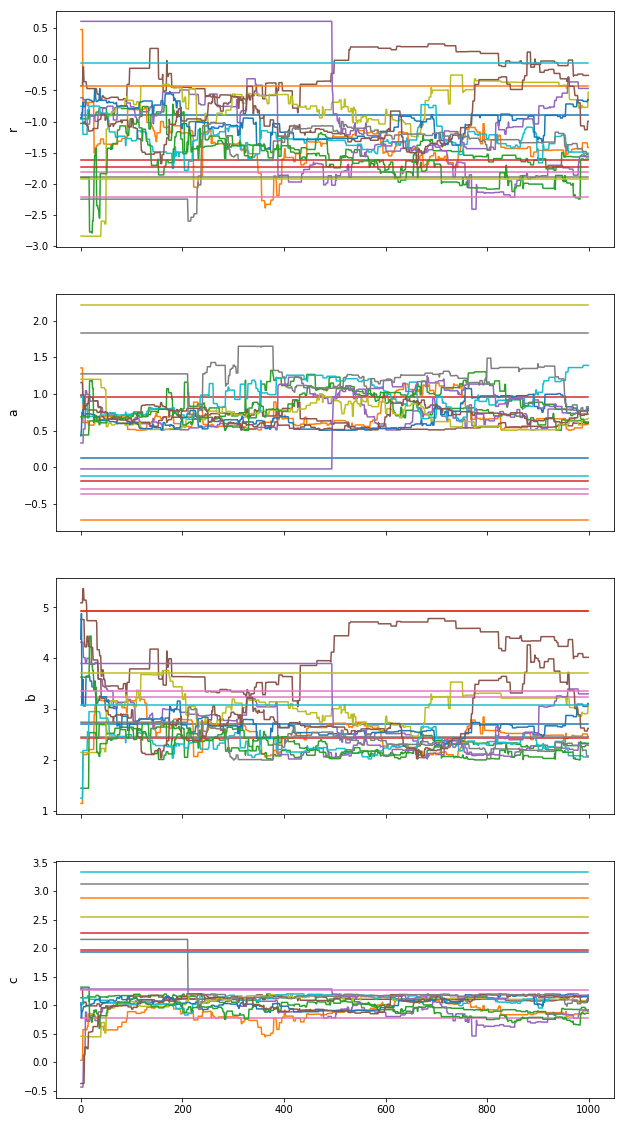

In [371]:
fig, axes = plt.subplots(ncols=1, nrows=4, sharex=True, figsize=(10,20))
steps = range(len(samples[0]))
for p,(par,ax) in enumerate(zip(parameters,axes)):
    for nw in range(len(samples)):
        vals = [samples[nw][i][p] for i in steps]
        ax.plot(steps, vals)
        ax.set_ylabel(par, fontsize=12);
#plt.savefig('../results/mcmc/chains_J1672_N10000.png', dpi=300)

In [372]:
L

array([ inf,  inf,  inf, ...,  inf,  inf,  inf])

In [364]:
flatsamples = samples[:, :, :].reshape((-1, len(samples[0][0])))

L = -lnprobs.reshape(-1)
Lmin = min(L)
indLmin = np.where( L==Lmin )[0][-1]
for p,(param,R) in enumerate( zip( parameters, gelman_rubin(samples) ) ):
    exec( '{par}_R = {gelrub}'.format(par=param, gelrub=R) )
    exec( "{} = flatsamples[:,p]".format(param) )
    exec( "{0}_min = {0}[indLmin]".format(param) )

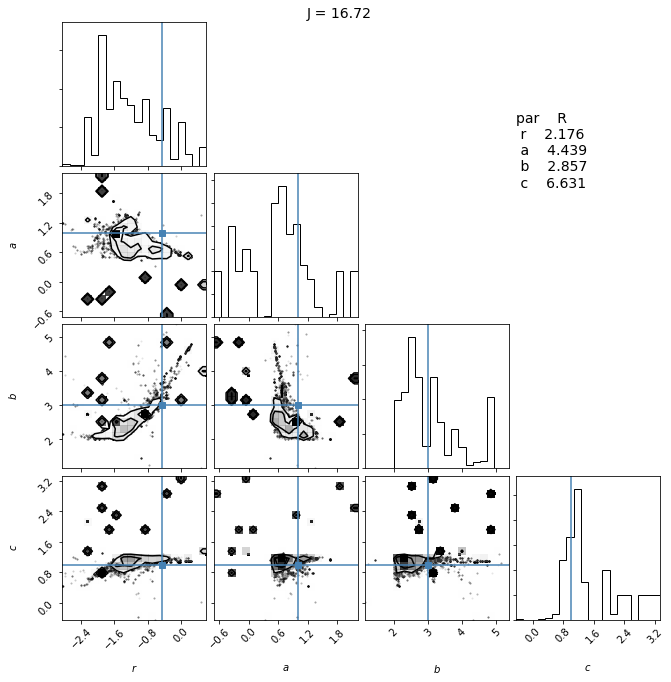

In [370]:
truep = [-0.46, 1, 3, 1]
minp = [r_min, a_min, b_min, c_min]
Rvals = '\n '.join(  ['par    R'] + [ p + '    ' + str(eval( 'round({}_R,3)'.format(p) )) for p in parameters] )

fig = corner(flatsamples, labels=["$r$", "$a$", "$b$", "$c$"], truths=truep)
plt.suptitle('J = %.2f'%J[0], fontsize=14);
plt.annotate(Rvals, xy=(0, 3), xycoords='axes fraction', fontsize=14);
plt.savefig('../results/mcmc/corner_equiR_J1672_N1000.png', dpi=300);

### 2D histogram of peak

In [71]:
from itertools import combinations

In [373]:
samples = np.load('../results/mcmc/samples_J1672_N10000.npy')
lnprobs = np.load('../results/mcmc/lnprobs_J1672_N10000.npy')
parameters = ['r', 'a', 'b', 'c']

In [374]:
flatsamples = samples.reshape( (-1, len(samples[0][0])) )
L = lnprobs.reshape(-1)

In [375]:
N = 100
thinsamples = np.array( [flatsamples[i*N] for i in range(len(flatsamples)/N)] )
thinlnprobs = np.array( [L[i*N] for i in range(len(flatsamples)/N) ] )

In [376]:
#flatsamples = samples.reshape( (-1, len(samples[0][0])) )
#L = lnprobs.reshape(-1)
flatsamples = thinsamples
L = thinlnprobs
Lmax = max(L)
indLmax = np.where( L==Lmax )[0][0]
ind2Dhist = np.where( L>Lmax-0.1 )[0]
for p,param in enumerate( parameters ):
    values = flatsamples[:,p]
    exec( "{} = values".format(param) )
    exec( "{}_min = values[indLmax]".format(param) )
    #print param, values[indLmax]

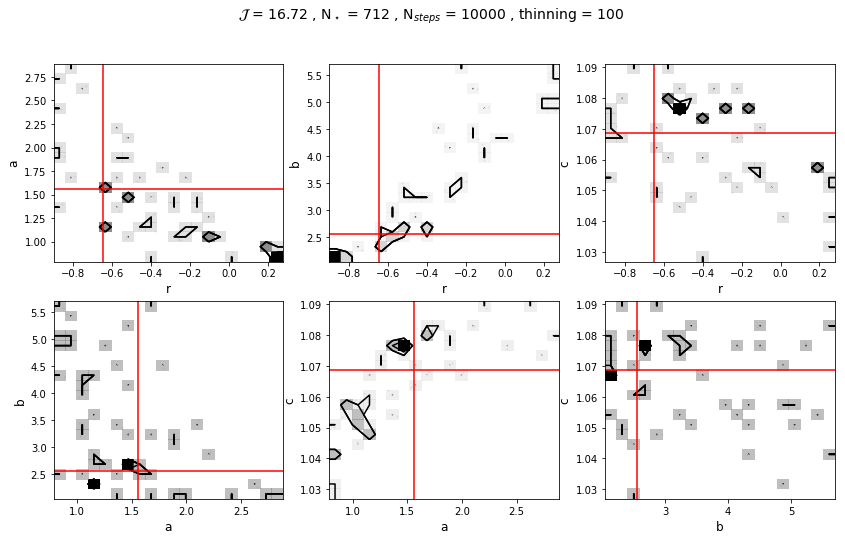

In [379]:
truevals = [-0.46, 1, 3, 1]
combs = combinations(range(4), 2)
fig, axes = plt.subplots(ncols=3, nrows=2, figsize=(14,8) )
for n,((i,j), ax) in enumerate( zip(combs, axes.flat) ):
    hist2d(x=flatsamples[ind2Dhist, i], y=flatsamples[ind2Dhist, j], ax=ax)
    ax.set_xlabel(parameters[i], fontsize=12);
    ax.set_ylabel(parameters[j], fontsize=12);
    ax.vlines(x=eval( '{}_min'.format(parameters[i]) ), 
              ymin=eval( 'min({})'.format(parameters[j]) ),
              ymax=eval( 'max({})'.format(parameters[j]) ),
              color='r')
    ax.hlines(y=eval( '{}_min'.format(parameters[j]) ), 
              xmin=eval( 'min({})'.format(parameters[i]) ),
              xmax=eval( 'max({})'.format(parameters[i]) ),
              color='r')
    '''ax.set_xlim(eval( '{}_min'.format(parameters[i]) ) - 0.05,
                eval( '{}_min'.format(parameters[i]) ) + 0.05)
    ax.set_ylim(eval( '{}_min'.format(parameters[j]) ) - 0.05,
                eval( '{}_min'.format(parameters[j]) ) + 0.05)'''
    #ax.plot(truevals[i], truevals[j], 'c*', ms=10)
#plt.tight_layout();
#plt.suptitle(r'$\mathcal{J}$ = 16.72 , N$_\star$ = 712 , N$_{steps}$ = 10000', fontsize=14);
#plt.savefig('../results/mcmc/2Dhists/2dhist_712s_J1672_N10000.png', dpi=300)
plt.suptitle(r'$\mathcal{J}$ = 16.72 , N$_\star$ = 712 , N$_{steps}$ = 10000 , thinning = %i'%N, fontsize=14);
plt.savefig('../results/mcmc/2Dhists/2dhist_712s_J1672_N10000_thin%i.png'%N, dpi=300)

In [259]:
Js = [14, 15, 16.01, 17.02]
parameters = ['r', 'a', 'b', 'c']
for J in Js:
    samples = np.load('../results/mcmc/emc_results/samples_J%i_N5000.npy'%(J*100))
    lnprobs = np.load('../results/mcmc/emc_results/lnprobs_J%i_N5000.npy'%(J*100))
    
    flatsamples = samples[:, :, :].reshape( (-1, len(samples[0][0])) )
    L = lnprobs.reshape(-1)
    Lmax = max(L)
    indLmax = np.where( L==Lmax )[0][0]
    ind2Dhist = np.where( L>Lmax-0.2 )[0]
    for p,par in enumerate( parameters ):
        values = flatsamples[:,p]
        exec( "{} = values".format(par) )
        exec( "{}_min = values[indLmax]".format(par) )
        #print param, min(values), max(values)
    
    combs = combinations(range(4), 2)
    fig, axes = plt.subplots(ncols=3, nrows=2, figsize=(14,8) )
    for n,((i,j), ax) in enumerate( zip(combs, axes.flat) ):
        hist2d(x=flatsamples[ind2Dhist, i], y=flatsamples[ind2Dhist, j], ax=ax)
        ax.set_xlabel(parameters[i], fontsize=12);
        ax.set_ylabel(parameters[j], fontsize=12);
        ax.vlines(x=eval( '{}_min'.format(parameters[i]) ), 
                  ymin=eval( 'min({})'.format(parameters[j]) ),
                  ymax=eval( 'max({})'.format(parameters[j]) ),
                  color='r')
        ax.hlines(y=eval( '{}_min'.format(parameters[j]) ), 
                  xmin=eval( 'min({})'.format(parameters[i]) ),
                  xmax=eval( 'max({})'.format(parameters[i]) ),
                  color='r')
    #plt.tight_layout();
    plt.suptitle(r'$\mathcal{J}$ = %.2f , N$_\star$ = 712 , N$_{steps}$ = 5000'%J, fontsize=14);
    plt.savefig('../results/mcmc/2Dhists/2Dhist_712s_J%i_N5000.png'%(J*100), dpi=300)
    plt.clf()
    plt.close()
    '''print J
    for p,param in enumerate( parameters ):
        print param, [eval( '{}[ind]'.format(param) ) for ind in np.where( L==Lmax )[0]]'''

## test convergence - via Geman-Rubin criteria - as a function of Nsteps

In [364]:
path = '/home/andrea/Desktop/work/DWARF/ASTROJPY/results/mcmc/'
files = os.listdir(path+'emc_results/')
#samples_list = sorted( [f for f in files if 'samples_100' in f and 'N10000.npy' in f] )
#lnprobs_list = sorted( [f for f in files if 'lnprobs_100' in f and 'N10000.npy' in f] )
samples_list = sorted( [f for f in files if 'samples' in f and 'N5000.npy' in f] )
lnprobs_list = sorted( [f for f in files if 'lnprobs' in f and 'N5000.npy' in f] )

indJ = np.where(['J' in s for s in samples_list[1].split('_')])[0][0]

J = [float( j.split('_')[indJ].strip('J') )/100 for j in samples_list]
parameters = ['r', 'a', 'b', 'c']

For  
- N$_\star$ = 10, $\sim$ 1000 steps in the chain suffice
- N$_\star$ = 100, $\sim$ 2000 steps it's a better choice
- N$_\star$ = 712, $\sim$ 3000 steps should suffice to given $R\approx1$

## plot all plots for all Js

In [2]:
def myround(x, base=5):
    return int(base * round(float(x)/base))

## build profile

In [319]:
path = '/home/andrea/Desktop/work/DWARF/ASTROJPY/results/mcmc/'
files = os.listdir(path+'emc_results/')
samples = sorted( [f for f in files if 'samples_10s' in f and 'N10000.npy' in f] )
lnprobs = sorted( [f for f in files if 'lnprobs_10s' in f and 'N10000.npy' in f] )
#samples = sorted( [f for f in files if 'samples' in f and 'N5000.npy' in f] )
#lnprobs = sorted( [f for f in files if 'lnprobs' in f and 'N5000.npy' in f] )

J = [float( j.split('_')[2].strip('J') )/100 for j in samples]

In [320]:
for var in ['L', 'r', 'a', 'b', 'c']:
    exec( '{}_min = []'.format(var) )

for j,(pars_file, lnprobs_file) in enumerate( zip(samples, lnprobs) ):
    # open loglikelihoods
    llikes = np.load(path+'emc_results/'+lnprobs_file)
    L = -llikes.reshape(-1)
    Lmin = min(L)
    indLmin = np.where( L==Lmin )[0][-1]
    L_min.append( Lmin )
    
    # parameters
    params = np.load(path+'emc_results/'+pars_file)
    flatparams = params[:, :, :].reshape((-1, len(params[0][0])))
    for p,(par,R) in enumerate( zip( ['r', 'a', 'b', 'c'], gelman_rubin(params) ) ):
        #print par, round(R,3)
        values = [flatparams[i][p] for i in range(len(flatparams))]
        exec( "{} = np.asarray(values)".format(par) )
        exec( "{0}_min.append( {0}[indLmin] )".format(par) )

In [321]:
interpL = interp(J, L_min)
eval_Like_J = np.linspace(min(J), max(J), 1000)
min_Like_J = interpL(eval_Like_J).min()
Jmin = eval_Like_J[ np.where( interpL(eval_Like_J) == min_Like_J )[0][0] ]

In [322]:
for i,c in enumerate([0.5, 2.0, 4.5]):
    exec('J%ssL = %.2f'%(i+1, brentq(lambda j : interpL(j)-interpL(J).min()-c, min(J), Jmin) - Jmin))
    exec('J%ssR = %.2f'%(i+1, brentq(lambda j : interpL(j)-interpL(J).min()-c, Jmin, max(J)) - Jmin))

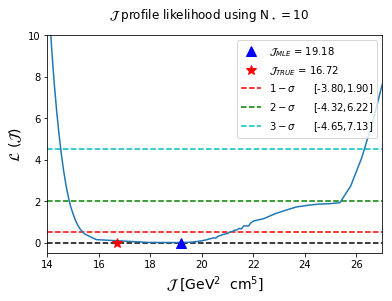

In [324]:
plt.plot(J, L_min-min(L_min));
plt.plot(Jmin, 0, 'b^', ms=10, label=r'$\mathcal{J}_{MLE}$ = %.2f'%Jmin);
plt.plot(16.72, 0, 'r*', ms=10, label=r'$\mathcal{J}_{TRUE}$ = 16.72');
plt.hlines(0, 14, 27, linestyles='dashed', colors='k');
for i,(c,h) in enumerate(zip(['r','g','c'],[0.5, 2.0, 4.5])):
    s = i+1
    JL, JR = eval( 'J{}sL'.format(s) ), eval( 'J{}sR'.format(s) )
    plt.hlines(h, 14, 27, linestyles='dashed', colors=c,
              label=r'$%i-\sigma$'%s+'\t'+'[%.2f,%.2f]'%(JL, JR))
plt.ylim(-0.5, 10);
plt.xlim(14, 27);
plt.xlabel(r'$\mathcal{J}$ [GeV$^2$  cm$^5$]', fontsize=14);
plt.ylabel(r'$\mathcal{L}$ ($\mathcal{J}$)', fontsize=14);
plt.legend(loc='upper right').get_frame().set_facecolor('w');
plt.suptitle(r'$\mathcal{J}$ profile likelihood using N$_\star = 10$');
#plt.savefig(path+'profileJ_10s.png', dpi=300);

# brute force

## L - r , a

In [77]:
samples = np.load('../results/mcmc/samples_Lra_J1672_N1000.npy')
lnprobs = np.load('../results/mcmc/lnprobs_Lra_J1672_N1000.npy')

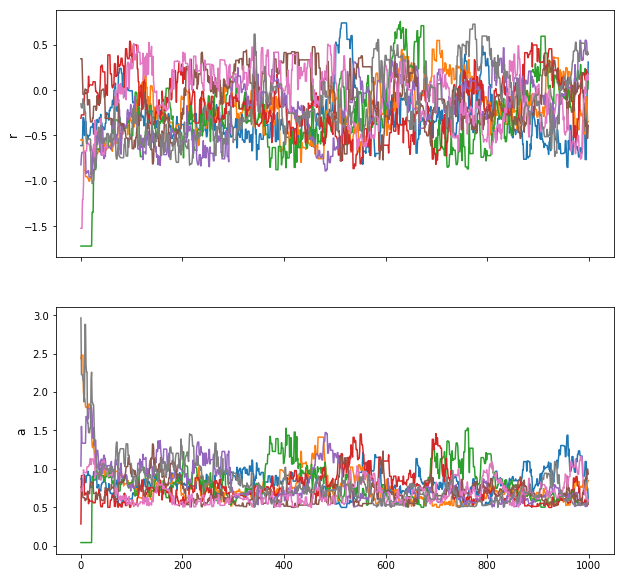

In [78]:
fig, axes = plt.subplots(ncols=1, nrows=2, sharex=True, figsize=(10,10))
steps = range(len(samples[0]))
for p,(par,ax) in enumerate(zip(['r', 'a'],axes)):
    for nw in range(len(samples)):
        vals = [samples[nw][i][p] for i in steps]
        ax.plot(steps, vals)
        ax.set_ylabel(par, fontsize=12);
#plt.savefig('../results/mcmc/chains_J1672_N10000.png', dpi=300)

In [79]:
pltsamples = samples[:, :, :].reshape((-1, len(samples[0][0])))

In [80]:
L = -lnprobs.reshape(-1)
Lmin = min(L)
indLmin = np.where( L==Lmin )[0][-1]
for p,par in enumerate(['r', 'a']):
    exec( "emc_{} = np.asarray([pltsamples[i][p] for i in range(len(pltsamples))])".format(par) )
    exec( '{0}_min = emc_{0}[indLmin]'.format(par) )

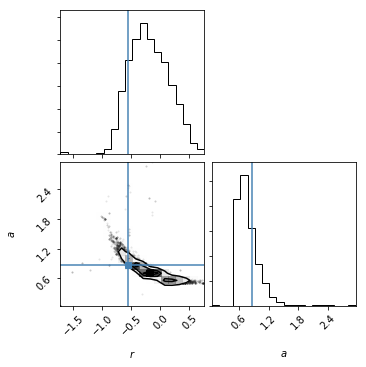

In [81]:
import corner
truep = [-0.55, 0.86]
minp = [r_min, a_min]
fig = corner.corner(pltsamples, labels=["$r$", "$a$"], truths=truep)
#plt.savefig('../results/mcmc/corner_Lra_J1672_N1000.png', dpi=300)

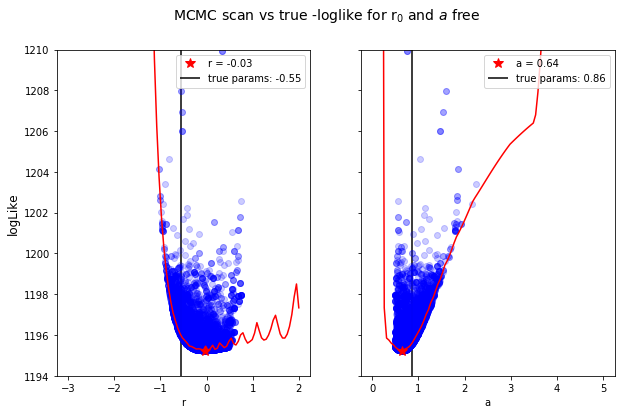

In [82]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,6), sharey=True)
for i,(par, ax) in enumerate(zip(['r', 'a'], axes.flat)):
    ax.plot( eval('emc_{}'.format(par)), L, 'bo', alpha=0.2  );
    exec( 'parmin = {}_min'.format(par) )
    ax.plot( parmin, Lmin, 'r*', ms=10, label= '%s = %.2f'%(par, parmin) );
    ax.vlines(x=truep[i], ymin=0, ymax=2000, label='true params: %.2f'%truep[i]);
    
    ax.plot( eval('bf_{}_arr'.format(par)), eval('bf_L{}_arr'.format(par)), c='r' )
    ax.set_xlabel(par);
    if i%2 == 0: 
        ax.set_ylabel('logLike', fontsize=12)
    ax.set_ylim(1194, 1210);
    ax.legend(numpoints=1, loc='upper right');
#plt.tight_layout()
plt.suptitle(r'MCMC scan vs true -loglike for r$_0$ and $a$ free', fontsize=14);
#plt.savefig('../results/mcmc/Lra100.png', dpi=300);

# PyMC

## determination of smoothing order via Leave-one-out cross-validation

In [61]:
min_splnmins = spline_mins(eval_Like_J).min()
Jminspl = eval_Like_J[ np.where( spline_mins(eval_Like_J) == min_splnmins )[0][0] ]

## plotting the true likelihood curve

# Minuit

In [148]:
J, L, a, b, c, r = np.load('../results/Minuit.npy')
linear_L = interp(J, L)

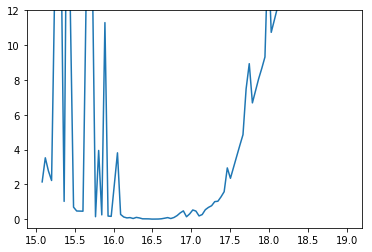

In [150]:
plt.plot(J, L-min(L));
plt.ylim(-0.5, 12);

In [69]:
eval_Like_J = np.linspace(J.min(), J.max(), 100)
min_Like_J = linear_L(eval_Like_J).min()
Jmin = eval_Like_J[ np.where( linear_L(eval_Like_J) == min_Like_J )[0][0] ]

In [70]:
for par in ['a', 'b', 'c', 'r']:
    exec( 'spl_{par} = interp(J, {par})'.format(par=par))
    exec( 'J{0} = float(spl_{0}(Jmin))'.format(par) )

In [71]:
for i,c in enumerate([0.5,2.0,4.5]):
    exec('J%ssL = %.2f'%(i+1, brentq(lambda j : linear_L(j)-linear_L(J).min()-c, J.min(), Jmin) - Jmin))
    exec('J%ssR = %.2f'%(i+1, brentq(lambda j : linear_L(j)-linear_L(J).min()-c, Jmin, J.max()) - Jmin))

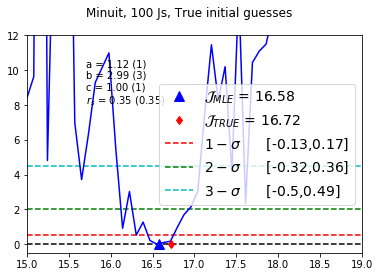

In [73]:
lin = linear_L(J)
plt.plot(J, lin-lin.min(), 'b');

plt.hlines(0, J.min(), J.max(), linestyles='dashed')
plt.plot(Jmin, 0, 'b^', markersize=10, label=r'$\mathcal{J}_{MLE}$ = %.2f'%Jmin)
plt.plot(16.72, 0, 'rd', markersize=6, label=r'$\mathcal{J}_{TRUE}$ = 16.72')
for i,(c,h) in enumerate(zip(['r','g','c'],[0.5,2.0,4.5])):
    JL, JR = eval('J%ssL'%str(i+1)), eval('J%ssR'%str(i+1))
    plt.hlines(h, J.min(), J.max(), linestyles='dashed', colors=c,
              label=r'$%i-\sigma$'%(i+1)+'\t'+'[%2s,%2s]'%(str(JL),str(JR)))
plt.legend(numpoints=1,fontsize=14).get_frame().set_facecolor('w')
plt.text(15.7, 8,'a = %.2f (1)'%Ja +'\n'+
                 'b = %.2f (3)'%Jb +'\n'+
                 'c = %.2f (1)'%Jc +'\n'+
                 r'$r_s$ = %.2f (0.35)'%Jr)

plt.ylim(-0.5,12);
plt.xlim(15, 19);
plt.suptitle('Minuit, 100 Js, True initial guesses');
#plt.savefig('results/LikeJ_Min_rabc_100p_Tini_lin.png',format='png',dpi=300);